<a href="https://colab.research.google.com/github/pedrecho/scrap_news/blob/main/citaty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

In [80]:
url = 'https://citaty.info/man?page='
sites = ''
for i in range(5):
  sites += requests.get(url + str(i)).text

In [81]:
from bs4 import BeautifulSoup

In [82]:
soup = BeautifulSoup(sites, "html.parser")

In [83]:
quotes = soup.findAll('article')
print(len(quotes))

80


In [84]:
text = []
author = []
tags = []
rating = []
for item in quotes:
  text.append(item.div.div.div.div.p.text.replace('\xa0', ' '))
  author.append(item.find('div', class_='field field-name-taxonomy-vocabulary-3 field-type-taxonomy-term-reference field-label-hidden').div.div.a.text)
  tg = item.find('div', class_='node__topics')
  tags.append([])
  if tg is not None:
    tg = tg.findAll('div', class_='field-items')
    for i in tg:
      tags[-1] += list(map(lambda x: x.text, i.findAll('a')))
  rating.append(int(item.find('div', class_='rating__value__digits').text.strip('\n ')))


In [85]:
import pandas as pd

In [86]:
data = pd.DataFrame({
    'Text': text,
    'Author': author,
    'Tags': tags,
    'Rating': rating
})
data.head()

,Text,Author,Tags,Rating
0,"Мир полон волшебных вещей, терпеливо ожидающих...",Уильям Батлер Йейтс,"[мир, мироздание]",10
1,Живая жизнь не может быть определена никаким к...,Викентий Викентьевич Вересаев,"[мудрые цитаты, жизнь, добро, борьба, смысл жи...",19
2,"У всех у нас есть страхи. Но у тех, кто смотри...",Эрнест Хемингуэй,"[цитаты со смыслом, смелость, храбрость, страх]",23
3,"Не тот твой друг, кто за столом с тобою пьёт,\...",Омар Хайям,"[мудрые цитаты, друзья, дружба, верность]",11
4,​​Самые прекрасные мгновения всегда полны грус...,Андре Моруа,"[жизненные цитаты, печаль, мгновение, момент]",14


In [87]:
import matplotlib.pyplot as plt
import statistics

In [88]:
print('Средний рейтинг цитат:', statistics.mean(data['Rating']))

Средний рейтинг цитат: 13.375


In [89]:
print('Самые популярные авторы цитат:', data['Author'].value_counts().head())

Самые популярные авторы цитат: Оскар Уайльд                    6
Виктор Гюго                     5
Альберт Эйнштейн                5
Михаил Сафарбекович Гуцериев    4
Фёдор Михайлович Достоевский    2
Name: Author, dtype: int64


In [90]:
tags = []
count = []
for items in data['Tags']:
  for item  in items:
    if item in tags:
      count[tags.index(item)] += 1
    else:
      tags.append(item)
      count.append(1)
print(len(tags), tags)
print(len(count), count)

148 ['мир, мироздание', 'мудрые цитаты', 'жизнь', 'добро', 'борьба', 'смысл жизни', 'цитаты со смыслом', 'смелость, храбрость', 'страх', 'друзья, дружба', 'верность', 'жизненные цитаты', 'печаль', 'мгновение, момент', 'цитаты на английском с переводом', 'нелепость', 'искания', 'совершенство', 'ум, интеллект', 'сердце', 'слезы', 'утешение', 'логика', 'слова', 'вред', 'улыбка', 'грустные цитаты', 'желания', 'мечта', 'мотивирующие цитаты', 'молодость, юность', 'образование', 'человек, люди', 'существование', 'мать', 'вера', 'религия, церковь', 'спор', 'разочарование', 'счастье', 'мудрость', 'жизненный опыт', 'любовь', 'смерть', 'возраст', 'одиночество', 'величие', 'ад', 'дьявол, сатана', 'красота', 'природа', 'будущее', 'вдохновляющие цитаты', 'уединение', 'везение, удача', 'саморазвитие и самосовершенствование', 'православие', 'Бог', 'истина', 'мужчина и женщина', 'рай', 'государство', 'душа', 'глаза', 'работа', 'искусство', 'жизненная позиция', 'личность', 'собаки', 'преданность', 'враг

In [93]:
tags2 = ['другие']
count2 = [0]
for i in range(len(count)):
  if count[i] < 7:
    count2[0] += count[i]
  else:
    tags2.append(tags[i])
    count2.append(count[i])
print(tags2)
print(count2)

['другие', 'жизнь', 'цитаты со смыслом', 'жизненные цитаты', 'цитаты на английском с переводом']
[196, 9, 11, 12, 10]


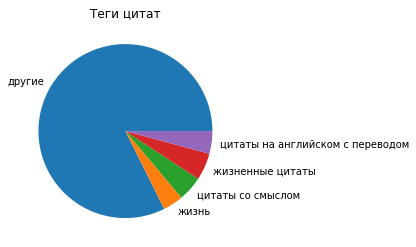

In [94]:
plt.title('Теги цитат')
plt.pie(count2, labels=tags2)
plt.show()